In [26]:
# Require libraries
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
from apyori import apriori  # type: ignore
import json

In [27]:
# Step 1: Simulated Data (Steam Games)
# Simulated data: list of transactions (replace this with your actual Steam data)
with open('data/steam.json', 'r') as file:
    transactions = json.load(file)

In [28]:
# Step 2: Remove Duplicates Within Transactions
transactions = [list(set(transaction)) for transaction in transactions]

In [29]:
# Step 3: Display the Transactions (Optional)
print(f"======> Total Users: {len(transactions)} <======")
for transaction in transactions:
    print(transaction)

======> Total Users: 300 <======
['Terraria', 'Stardew Valley', 'Rainbow Six Siege', 'Team Fortress 2', 'Counter-Strike', 'Rust']
['Among Us', 'Terraria', 'Portal 2', 'Stardew Valley', 'ARK: Survival Evolved', 'Team Fortress 2', 'Call of Duty: Modern Warfare', 'Dota 2', 'Left 4 Dead 2', 'Rust']
['Cyberpunk 2077', 'Terraria', 'The Witcher 3', 'Fall Guys', 'ARK: Survival Evolved', 'Hollow Knight', 'Left 4 Dead 2', 'Counter-Strike']
['Terraria', 'Stardew Valley', 'Fall Guys', "Garry's Mod", 'Hollow Knight', 'ARK: Survival Evolved', 'Phasmophobia']
['Among Us', 'Terraria', 'Cyberpunk 2077', 'Stardew Valley', "Garry's Mod", 'ARK: Survival Evolved', 'Hollow Knight', 'Left 4 Dead 2', 'Rust']
['Cyberpunk 2077', 'Terraria', 'Among Us', 'Stardew Valley', 'Apex Legends', 'Rainbow Six Siege', 'Hollow Knight', 'Call of Duty: Modern Warfare', 'Dota 2', 'Counter-Strike']
['Cyberpunk 2077', 'The Witcher 3', 'Terraria', 'Apex Legends', 'Hollow Knight', 'Call of Duty: Modern Warfare', 'Counter-Strike']


In [30]:
# Step 4: Generate Frequent Itemsets Using Apriori
min_confidence = 0.4
min_lift = 1.2
min_support = 0.01

# Apply the apriori algorithm on the transaction list
results = list(apriori(transactions, min_support = min_support, min_confidence = min_confidence, min_lift = min_lift))

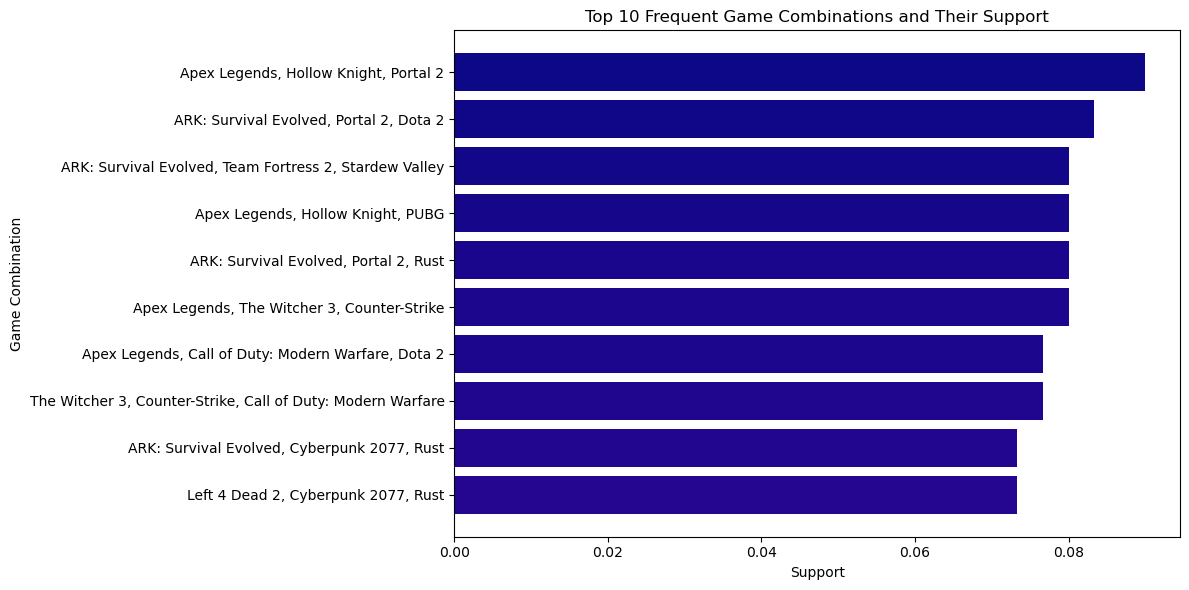

In [31]:
# Step 5: Display Graphic of the Top 10 Frequent Game Combinations
# Sort by 'Support' and get the top 10 frequent game combinations
results_df = pd.DataFrame([(tuple(result.items), result.support) 
                           for result in results], 
                          columns=['Itemset', 'Support'])

# Convert itemsets to string format for easier visualization
results_df['Itemset_str'] = results_df['Itemset'].apply(lambda x: ', '.join(x))

# Sort by 'Support' and get the top 10 frequent game combinations
top_10_results = results_df.sort_values(by='Support', ascending=False).head(10)

# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
plt.barh(top_10_results['Itemset_str'], top_10_results['Support'], color=plt.cm.plasma(range(256)))

# Title and labels
plt.title('Top 10 Frequent Game Combinations and Their Support')
plt.xlabel('Support')
plt.ylabel('Game Combination')

# Invert y-axis to have the most frequent combination on top
plt.gca().invert_yaxis()

# Display the plot
plt.tight_layout()
plt.show()

In [32]:
# Step 6: Generate Association Rules for Game Recommendations
# Now, we extract the rules and provide recommendations based on the games a user plays
print("=====> Game Recommendation Rules <=====")
for result in results:
    items = list(result.items)  
    support = result.support
    for ordered_stat in result.ordered_statistics:
        antecedent = list(ordered_stat.items_base)
        consequent = list(ordered_stat.items_add)
        confidence = ordered_stat.confidence
        lift = ordered_stat.lift
        if antecedent and consequent:
            print(f"Rule: {antecedent} -> {consequent}")
            print(f"Support: {support:.4f}\nConfidence: {confidence:.4f}\nLift: {lift:.4f}")
            print("-" * 30)

=====> Game Recommendation Rules <=====
Rule: ['ARK: Survival Evolved', 'Among Us'] -> ['Stardew Valley']
Support: 0.0600
Confidence: 0.4737
Lift: 1.2576
------------------------------
Rule: ['ARK: Survival Evolved', 'Among Us'] -> ['Terraria']
Support: 0.0567
Confidence: 0.4474
Lift: 1.3288
------------------------------
Rule: ['ARK: Survival Evolved', 'Apex Legends'] -> ['Terraria']
Support: 0.0700
Confidence: 0.4667
Lift: 1.3861
------------------------------
Rule: ['ARK: Survival Evolved', 'Call of Duty: Modern Warfare'] -> ['Counter-Strike']
Support: 0.0667
Confidence: 0.4762
Lift: 1.3736
------------------------------
Rule: ['ARK: Survival Evolved', 'Counter-Strike'] -> ['Call of Duty: Modern Warfare']
Support: 0.0667
Confidence: 0.5263
Lift: 1.3973
------------------------------
Rule: ['ARK: Survival Evolved', 'Call of Duty: Modern Warfare'] -> ['Dota 2']
Support: 0.0733
Confidence: 0.5238
Lift: 1.3784
------------------------------
Rule: ['ARK: Survival Evolved', 'Dota 2'] -> [